In [27]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [28]:
#Load Datasets
df = pd.read_csv('a10.csv')
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


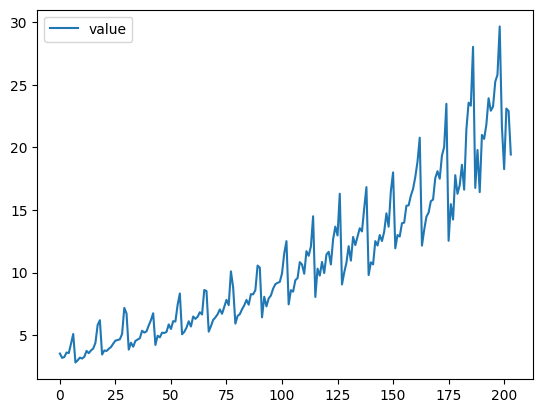

In [29]:
# Visual representation of Dataset
df.plot()
plt.show()

This shows that there is trend in the dataset.
there is non linear trend and non linear seasonality

Now let’s move on to the next step which is EDA & Data processing.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   value   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


Date column has object dtype so we change it to datetime

In [31]:
df['date'] = df['date'].astype('datetime64')
df.sort_values('date')
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [32]:
df.set_index('date', inplace=True)
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


ETS Decomposition

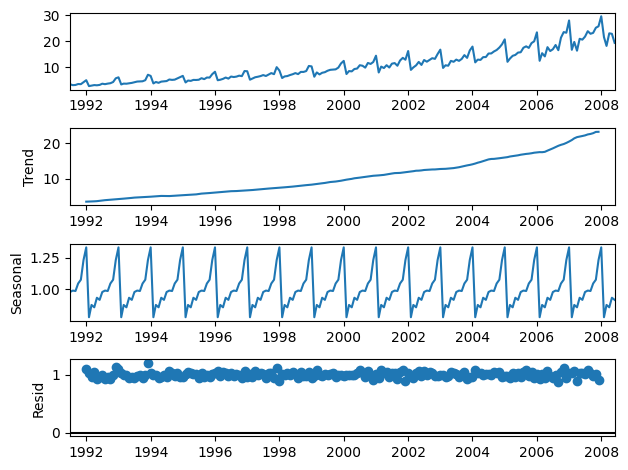

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

if components are dependent on each other, it has non-linear seasonality and non-linear trend. 
so we use Multiplicative mathematical model of time series

In [34]:
# to check Trend
result.trend.unique()[:5]

array([       nan, 3.50334358, 3.52789128, 3.56551069, 3.60044686])

In [35]:
# to check Seasonality
result.seasonal.unique()

array([0.97850853, 0.98972232, 0.98641842, 1.04550855, 1.07557345,
       1.23036577, 1.33054634, 0.77955377, 0.87637901, 0.85777741,
       0.93304647, 0.91659997])

In [36]:
# to check residual
result.resid.unique()[:5]

array([       nan, 1.09159858, 1.02339449, 0.95553941, 1.037689  ])

Autoregression

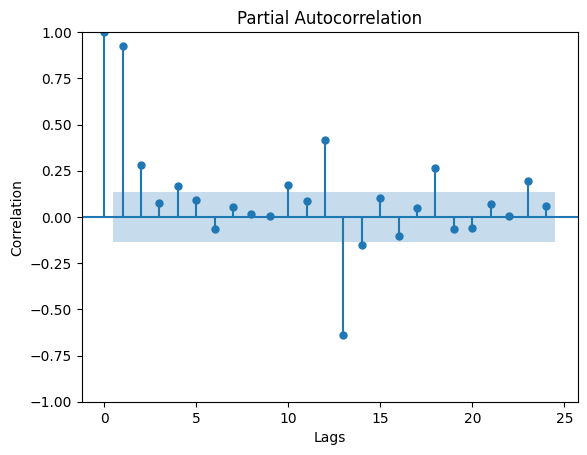

In [37]:
# we use pacf plot to find order of autoregression
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

Assuming the threshold 0.75
Order of Autoregression = 1

Moving Average

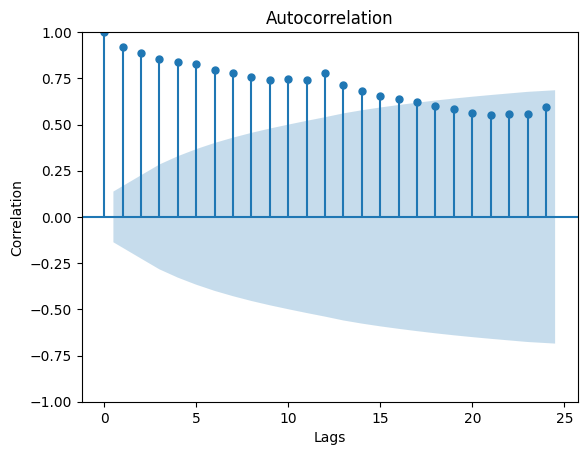

In [38]:
# to find order of moving average we use acf plot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

Assuming the threshold 0.75
Order of Moving Average = 12

Order of Differencing

In [39]:
# to check Stationarity we use ADFuller test
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey Fuller Test

result = adfuller(df)
result[1]

1.0

since p value is not less than or equal to 0.05, we need to make time series Stationary. 

In [40]:
df_diff1 = df.diff().dropna()
result = adfuller(df_diff1)
result[1]

0.11665341686467728

In [41]:
df_diff2 = df_diff1.diff().dropna()
result = adfuller(df_diff2)
result[1]

3.5439163585256426e-18

which means 3.54*10^-18
Therefore the above differencing is less than 0.05

Order of Differencing = 2

In [42]:
# to Apply ARIMA MODEL 
len(df)

204

In [43]:
train = df[:190]
test = df[190:]
len(test)

14

In [50]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(12,2,1)).fit()
fc = model.forecast(14)
fc[:5]

2007-05-01    20.492101
2007-06-01    18.589691
2007-07-01    19.262122
2007-08-01    20.574276
2007-09-01    18.796329
Freq: MS, Name: predicted_mean, dtype: float64

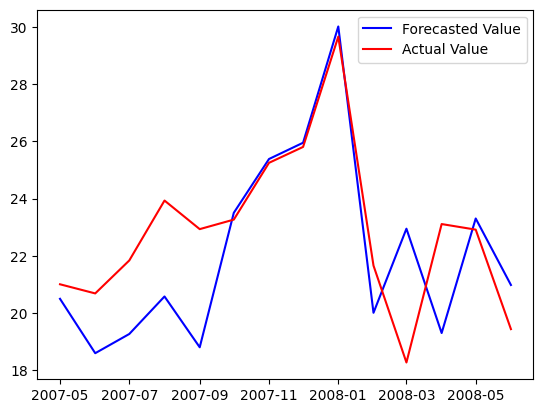

In [51]:
# visual representation of Prediction
plt.plot(fc, color='blue', label='Forecasted Value')
plt.plot(test, color='red', label='Actual Value')
plt.legend()
plt.show()

In [52]:
fc.describe()

count    14.000000
mean     22.078221
std       3.307414
min      18.589691
25%      19.472333
50%      20.775110
75%      23.451418
max      30.020392
Name: predicted_mean, dtype: float64

In [53]:
# Evaluation
from sklearn.metrics import mean_squared_error

print(f"MSE -: {mean_squared_error(test, fc)}")
print(f"RMSE -: {np.sqrt(mean_squared_error(test, fc))}")

MSE -: 5.823507601019613
RMSE -: 2.4131944805629764
